In [ ]:
import json
import os, glob

from itertools import product

import numpy as np
import pandas as pd

import torch

import matplotlib.pyplot as plt
import torchaudio

from torchaudio.functional.filtering import lowpass_biquad, highpass_biquad
from torchaudio.transforms import Spectrogram, AmplitudeToDB

from matplotlib import rcParams

from collections import defaultdict

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import seaborn as sns

from config import SynthConfig, Config
from synth.synth_architecture import SynthModular

sns.set_style('whitegrid')

spectrogram = Spectrogram(n_fft=128)
db = AmplitudeToDB()

In [2]:
synth_cfg = SynthConfig()
cfg = Config()

synth_obj = SynthModular(synth_cfg=synth_cfg,
                         sample_rate=cfg.sample_rate,
                         signal_duration_sec=cfg.signal_duration_sec,
                         num_sounds=1,
                         device='cpu',
                         preset='FM_FILTER')

In [28]:
params = {(0,0): {'operation': 'lfo', 'parameters': {'freq': [8], 'waveform': ['sawtooth']}},
          (0,1): {'operation': 'fm', 'parameters': {'freq_c': [700], 'waveform': ['sine'], 'mod_index': [0]}},
          (0,2): {'operation': 'filter', 'parameters': {'filter_type': ['low_pass'], 'filter_freq': [300]}}}

synth_obj.update_cells_from_dict(params)
synth_obj.generate_signal(num_sounds=1)
sound = synth_obj.signal.detach().cpu()[0]

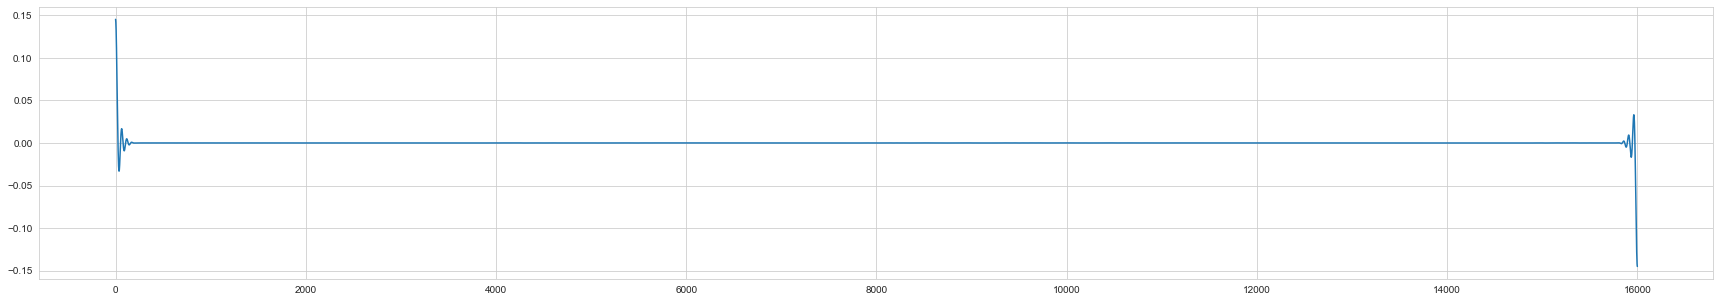

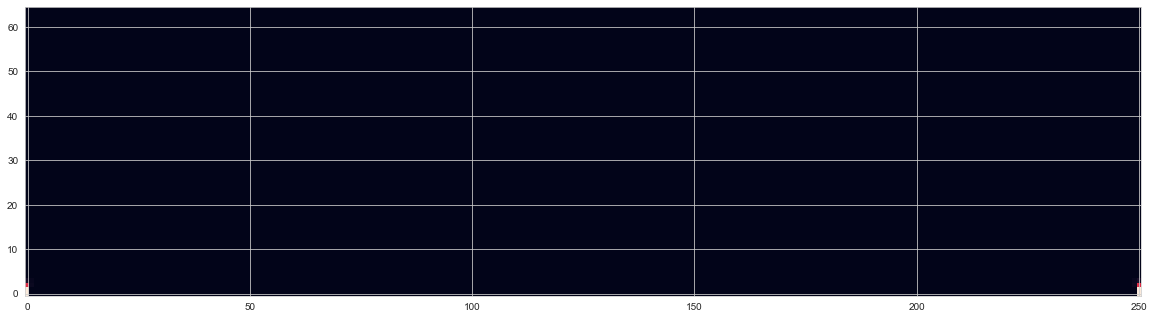

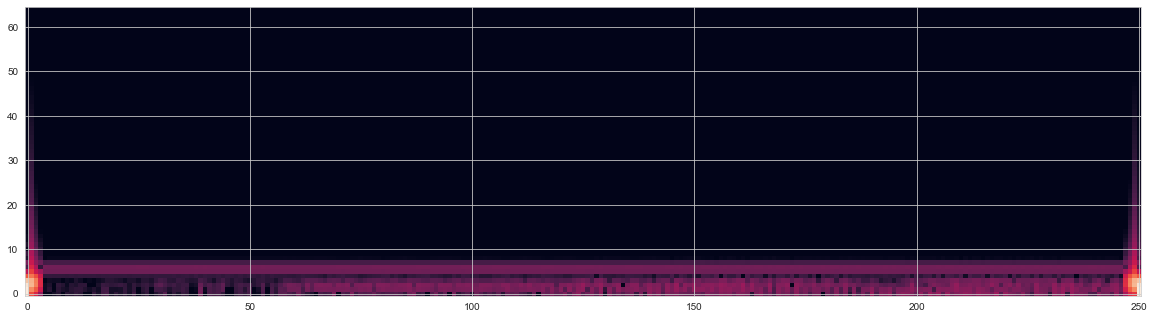

In [29]:
spec = spectrogram(sound)
db_spec = db(spec)

fig, ax = plt.subplots(1, 1, figsize=(30, 5))
ax.plot(sound.numpy())

fig2, ax2 = plt.subplots(1, 1, figsize=(20, 20))
ax2.imshow(spec.numpy(), origin='lower')

fig3, ax3 = plt.subplots(1, 1, figsize=(20, 20))
ax3.imshow(db_spec.numpy(), origin='lower')

plt.show()